In [92]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
from scipy import stats as st
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [93]:
tiles = pd.read_csv(r'/content/drive/MyDrive/capstone/Tiles.csv')

In [94]:
tiles.head(5)

,Unnamed: 0,Tile_ID,Lat1,Lat2,Long1,Long2,Mid_lat,Mid_long
0,0,0,37.708251,37.709155,-122.391313,-122.392454,37.708703,-122.391884
1,1,1,37.708251,37.709155,-122.392454,-122.393594,37.708703,-122.393024
2,2,2,37.708251,37.709155,-122.393594,-122.394734,37.708703,-122.394164
3,3,3,37.708251,37.709155,-122.394734,-122.395874,37.708703,-122.395304
4,4,4,37.708251,37.709155,-122.395874,-122.397014,37.708703,-122.396444


In [95]:
len(tiles)

12227

Split street characterstics into tiles

Stop signs <br>
https://data.sfgov.org/Transportation/Stop-Signs/4542-gpa3

In [96]:
stops = pd.read_csv(r'/content/drive/MyDrive/capstone/Stop_Signs.csv')
stops.head(5)

,STREET,X_STREET,DIRECTION,ST_FACING,DIST,CNN,CONCATENAT,MTAB_DATE,MTAB_RESO_TEXT,MTAB_MOTION,STATUS,WORKORDER,INSTALL_DATE,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,MORAGA ST,45TH AVE,NE,WB,0,27930000.0,MORAGA ST & 45TH AVE,2.021062e+13,NaN,6423,I,21-02595,2.021072e+13,POINT (-122.50446 37.75488),39.0,39.0,10,7,35
1,PERU,ATHENS,NaN,EB,NaN,21652000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.42493 37.726322),90.0,90.0,9,1,7
2,LA PLAYA ST,JUDAH,NW,SB,0,27960000.0,LA PLAYA ST & JUDAH,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.50914 37.76028),39.0,39.0,10,7,35
3,37TH AVE,CABRILLO,NW,SB,0,27863000.0,37TH AVE & CABRILLO,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.497185 37.77385),8.0,8.0,8,4,29
4,PRESIDIO,GEARY,SE,NB,NaN,26834000.0,PRESIDIO AVE & GEARY BLVD,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.44582 37.78249),13.0,13.0,8,6,18


In [97]:
# all stop signs have lat/long 
pd.notnull(stops['shape']).unique()

array([ True])

In [98]:
import re

stop_lat = []
stop_long = []
for i in stops['shape']: 
    split = re.split(' |\(|\)', i)
    stop_lat = np.append(stop_lat, float(split[3]))
    stop_long = np.append(stop_long, float(split[2]))
    
stops['latitude'] = stop_lat
stops['longitude'] = stop_long

In [99]:
stops.head(5)

,STREET,X_STREET,DIRECTION,ST_FACING,DIST,CNN,CONCATENAT,MTAB_DATE,MTAB_RESO_TEXT,MTAB_MOTION,...,WORKORDER,INSTALL_DATE,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,latitude,longitude
0,MORAGA ST,45TH AVE,NE,WB,0,27930000.0,MORAGA ST & 45TH AVE,2.021062e+13,NaN,6423,...,21-02595,2.021072e+13,POINT (-122.50446 37.75488),39.0,39.0,10,7,35,37.754880,-122.504460
1,PERU,ATHENS,NaN,EB,NaN,21652000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,POINT (-122.42493 37.726322),90.0,90.0,9,1,7,37.726322,-122.424930
2,LA PLAYA ST,JUDAH,NW,SB,0,27960000.0,LA PLAYA ST & JUDAH,NaN,NaN,NaN,...,NaN,NaN,POINT (-122.50914 37.76028),39.0,39.0,10,7,35,37.760280,-122.509140
3,37TH AVE,CABRILLO,NW,SB,0,27863000.0,37TH AVE & CABRILLO,NaN,NaN,NaN,...,NaN,NaN,POINT (-122.497185 37.77385),8.0,8.0,8,4,29,37.773850,-122.497185
4,PRESIDIO,GEARY,SE,NB,NaN,26834000.0,PRESIDIO AVE & GEARY BLVD,NaN,NaN,NaN,...,NaN,NaN,POINT (-122.44582 37.78249),13.0,13.0,8,6,18,37.782490,-122.445820


In [100]:
stop = []
for i in range(len(tiles)):
    ti = tiles.iloc[i]
    lat1 = ti['Lat1']
    lat2 = ti['Lat2']
    long1 = ti['Long1']
    long2 = ti['Long2']
    f = len(stops[(stops['latitude'] < lat2) & (stops['latitude'] > lat1) & (stops['longitude'] > long2) & (stops['longitude'] < long1)])
    stop = np.append(stop,f)

In [101]:
tiles['Stop_Signs'] = stop

In [102]:
tiles[tiles['Stop_Signs'] > 0]

,Unnamed: 0,Tile_ID,Lat1,Lat2,Long1,Long2,Mid_lat,Mid_long,Stop_Signs
1,1,1,37.708251,37.709155,-122.392454,-122.393594,37.708703,-122.393024,3.0
2,2,2,37.708251,37.709155,-122.393594,-122.394734,37.708703,-122.394164,1.0
12,12,12,37.708251,37.709155,-122.404995,-122.406135,37.708703,-122.405565,1.0
20,20,20,37.708251,37.709155,-122.414116,-122.415256,37.708703,-122.414686,3.0
21,21,21,37.708251,37.709155,-122.415256,-122.416396,37.708703,-122.415826,4.0
...,...,...,...,...,...,...,...,...,...
11995,11995,11995,37.805840,37.806744,-122.423237,-122.424377,37.806292,-122.423807,3.0
12005,12005,12005,37.805840,37.806744,-122.434638,-122.435778,37.806292,-122.435208,3.0
12009,12009,12009,37.805840,37.806744,-122.439198,-122.440338,37.806292,-122.439768,4.0
12055,12055,12055,37.806744,37.807648,-122.418676,-122.419816,37.807196,-122.419246,5.0


Street Paving <br>
https://data.sfgov.org/d/5wbp-dwzt/about

In [103]:
paving_all = pd.read_csv(r'/content/drive/MyDrive/capstone/Utility_Excavation_Moratorium_Streets.csv')
paving_all.head(5)

,CNN,Streetname,Limits,JobOrderNum,EffectiveDate,ExpirationDate,ModifiedDate,ID,X,Y,Latitude,Longitude,Location,point,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,13730000,WOOLSEY ST,BOWDOIN ST to DARTMOUTH ST (800 - 899),2977J,04/01/2022 12:00:00 AM,04/01/2027 12:00:00 AM,04/11/2022 09:57:48 AM,34852,6.009288e+06,2.091470e+06,37.723302,-122.410007,"(37.72330157541044, -122.41000739523302)",NaN,NaN,NaN,NaN,NaN,NaN
1,13731000,WOOLSEY ST,DARTMOUTH ST to COLBY ST (900 - 999),2977J,03/31/2022 12:00:00 AM,03/31/2027 12:00:00 AM,04/11/2022 09:54:08 AM,34854,6.009001e+06,2.091382e+06,37.723044,-122.410993,"(37.72304412011837, -122.41099254630903)",NaN,NaN,NaN,NaN,NaN,NaN
2,13732000,WOOLSEY ST,COLBY ST to UNIVERSITY ST (1000 - 1099),2977J,03/31/2022 12:00:00 AM,03/31/2027 12:00:00 AM,04/11/2022 09:54:08 AM,34856,6.008715e+06,2.091294e+06,37.722787,-122.411977,"(37.72278693382726, -122.41197662933816)",NaN,NaN,NaN,NaN,NaN,NaN
3,20876000,WOOLSEY ST,COLBY ST intersection,2977J,03/31/2022 12:00:00 AM,03/31/2027 12:00:00 AM,04/11/2022 09:54:08 AM,34855,6.008858e+06,2.091338e+06,37.722915,-122.411485,"(37.72291542361495, -122.41148498754468)",NaN,NaN,NaN,NaN,NaN,NaN
4,20868000,WOOLSEY ST,BOWDOIN ST intersection,2977J,04/01/2022 12:00:00 AM,04/01/2027 12:00:00 AM,04/11/2022 09:57:48 AM,34851,6.009431e+06,2.091514e+06,37.723430,-122.409515,"(37.72343033432908, -122.4095146857055)",NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#paving = paving_all[paving_all['EffectiveDate'] < '09/30/2020']

In [105]:
#paving.head(5)

In [106]:
#paving = paving_all[paving_all['EffectiveDate'] < '09/30/2022']
paving = paving_all

pave = []
for i in range(len(tiles)):
    ti = tiles.iloc[i]
    lat1 = ti['Lat1']
    lat2 = ti['Lat2']
    long1 = ti['Long1']
    long2 = ti['Long2']
    f = len(paving[(paving['Latitude'] < lat2) & (paving['Latitude'] > lat1) & (paving['Longitude'] > long2) & (paving['Longitude'] < long1)])
    pave = np.append(pave,f)

In [107]:
tiles['Paving'] = pave

In [108]:
tiles[tiles['Paving'] > 0]

,Unnamed: 0,Tile_ID,Lat1,Lat2,Long1,Long2,Mid_lat,Mid_long,Stop_Signs,Paving
12,12,12,37.708251,37.709155,-122.404995,-122.406135,37.708703,-122.405565,1.0,4.0
14,14,14,37.708251,37.709155,-122.407275,-122.408415,37.708703,-122.407845,0.0,1.0
19,19,19,37.708251,37.709155,-122.412976,-122.414116,37.708703,-122.413546,0.0,1.0
21,21,21,37.708251,37.709155,-122.415256,-122.416396,37.708703,-122.415826,4.0,1.0
22,22,22,37.708251,37.709155,-122.416396,-122.417536,37.708703,-122.416966,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
12107,12107,12107,37.807648,37.808551,-122.412976,-122.414116,37.808099,-122.413546,0.0,1.0
12108,12108,12108,37.807648,37.808551,-122.414116,-122.415256,37.808099,-122.414686,0.0,3.0
12109,12109,12109,37.807648,37.808551,-122.415256,-122.416396,37.808099,-122.415826,0.0,2.0
12110,12110,12110,37.807648,37.808551,-122.416396,-122.417536,37.808099,-122.416966,0.0,2.0


311 Cases <br>
https://data.sfgov.org/City-Infrastructure/311-Cases/vw6y-z8j6

In [109]:
#cases = pd.read_csv(r'.\Data\311_Cases.csv')
#cases.head(5)

In [110]:
#stop = []
#for i in range(len(tiles)):
#    ti = tiles.iloc[i]
#    lat1 = ti['Lat1']
#    lat2 = ti['Lat2']
#    long1 = ti['Long1']
#    long2 = ti['Long2']
#    f = len(stop[(stop['latitude'] < lat2) & (stop['latitude'] > lat1) & (stop['longitude'] > long2) & (stop['longitude'] < long1)])
#    stop = np.append(stop,f)

In [111]:
#tiles['Stop_Signs'] = stop

Split historical and future collision data into tiles

In [112]:
collisions = pd.read_csv(r'/content/drive/MyDrive/capstone/transbase_collisions_02112023.csv')
collisions.head(5)

#collisions.columns

# dataset is from 2017 - September 30 2022
# Historical Group: Oct 1 2018 - September 30 2020
# Future Group: Oct 1 2020 - September 30 2022

collisions['Historical'] = np.where((collisions['collision_date'] >= 20181001) & (collisions['collision_date'] <= 20200930),1,0)

collisions['Future'] = np.where((collisions['collision_date'] >= 20201001) & (collisions['collision_date'] <= 20220930),1,0)

collisions.head(5)

,type,geometry,case_id_pkey,collision_severity,accident_year,collision_date,collision_time,distance,direction,pcf_viol_category,...,bndy_type,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,Historical,Future
0,Feature,[object Object],17045414,Injury (Complaint of Pain),2017,20171227,1849.0,0,Not Stated,Unknown,...,Geographic Boundary,1.0,Driver,South,Proceeding Straight,Driver,East,Proceeding Straight,0,0
1,Feature,[object Object],170800277,Injury (Complaint of Pain),2017,20171001,145.0,28,South,Unsafe speed for prevailing conditions,...,Geographic Boundary,1.0,Driver,North,Proceeding Straight,Driver,North,Making Left Turn,0,0
2,Feature,[object Object],170800299,Injury (Other Visible),2017,20171001,233.0,0,Not Stated,Violation of right-of-way - left turn,...,Geographic Boundary,1.0,Driver,East,Making Left Turn,Driver,South,Proceeding Straight,0,0
3,Feature,[object Object],170801106,Injury (Other Visible),2017,20171001,1228.0,99,East,Violation of right-of-way - left turn,...,Geographic Boundary,1.0,Driver,West,Making U Turn,Bicyclist,West,Proceeding Straight,0,0
4,Feature,[object Object],170801225,Injury (Complaint of Pain),2017,20171001,1300.0,210,North,Opening door on traffic side when unsafe,...,Geographic Boundary,1.0,Other,South,Stopped In Road,Driver,South,Passing Other Vehicle,0,0


In [113]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14866 entries, 0 to 14865
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     14866 non-null  object 
 1   geometry                 14866 non-null  object 
 2   case_id_pkey             14866 non-null  object 
 3   collision_severity       14866 non-null  object 
 4   accident_year            14866 non-null  int64  
 5   collision_date           14866 non-null  int64  
 6   collision_time           14858 non-null  float64
 7   distance                 14866 non-null  int64  
 8   direction                14866 non-null  object 
 9   pcf_viol_category        14866 non-null  object 
 10  pcf_violation            14833 non-null  object 
 11  pcf_viol_subsection      0 non-null      float64
 12  type_of_collision        14866 non-null  object 
 13  mviw                     14866 non-null  object 
 14  street_view           

In [114]:
# adding historical and future collisions to data frame

# 'Tile_ID', 'Lat1', 'Lat2', 'Long1', 'Long2', 'Mid'
collisions_fh = collisions[(collisions['Future'] == 1) | (collisions['Historical'] == 1)]
collisions_f = collisions[collisions['Future'] == 1]
collisions_h = collisions[collisions['Historical'] == 1]
# for every tile, sum the future and historical collisions 
# the collision should take place within the tile 
fut = []
his = []
for i in range(len(tiles)):
    ti = tiles.iloc[i]
    lat1 = ti['Lat1']
    lat2 = ti['Lat2']
    long1 = ti['Long1']
    long2 = ti['Long2']
    f = len(collisions_f[(collisions_f['latitude'] < lat2) & (collisions_f['latitude'] > lat1) & (collisions_f['longitude'] > long2) & (collisions_f['longitude'] < long1)])
    h = len(collisions_h[(collisions_h['latitude'] < lat2) & (collisions_h['latitude'] > lat1) & (collisions_h['longitude'] > long2) & (collisions_h['longitude'] < long1)])
    fut = np.append(fut,f)
    his = np.append(his,h)

In [115]:
tiles['Future'] = fut
tiles['Historical'] = his

Scrape data and create model that takes inputs of satellite images or OSM files

Exporting to csv

In [116]:
tiles.to_csv('/content/drive/MyDrive/capstone/Tiles_expanded.csv')

In [117]:
tiles = tiles.drop(['Unnamed: 0'], axis=1)

In [145]:
def get_score(x):
    if (0.80 < x) & (x <= 1):
         return 1
    if (0.60 < x) & (x <= 0.80):
         return 0.8
    if (0.40 < x) & (x <= 0.60):
         return 0.6
    if (0.20 < x) & (x <= 0.40):
         return 0.4
    if (0.00 < x) & (x <= 0.20):
         return 0.2
    if x == 0.00:
         return 0

tiles['Collision_rate'] = tiles['Historical']/tiles['Historical'].max()

tiles['Severity'] = tiles['Collision_rate'].apply(get_score)

In [146]:
#tiles['Historical'].max()
tiles.sort_values(by=['Historical'], ascending=False)

,Tile_ID,Lat1,Lat2,Long1,Long2,Mid_lat,Mid_long,Stop_Signs,Paving,Future,Historical,Collision_rate,Severity
8381,8381,37.771503,37.772407,-122.423237,-122.424377,37.771955,-122.423807,1.0,0.0,19.0,21.0,1.000000,1.0
8505,8505,37.772407,37.773311,-122.436918,-122.438058,37.772859,-122.437488,0.0,0.0,10.0,20.0,0.952381,1.0
8491,8491,37.772407,37.773311,-122.420956,-122.422097,37.772859,-122.421527,0.0,0.0,19.0,20.0,0.952381,1.0
9607,9607,37.781443,37.782347,-122.409555,-122.410695,37.781895,-122.410125,1.0,0.0,8.0,19.0,0.904762,1.0
8829,8829,37.775118,37.776021,-122.415256,-122.416396,37.775570,-122.415826,1.0,0.0,11.0,18.0,0.857143,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,4380,37.740781,37.741684,-122.371932,-122.373072,37.741233,-122.372502,0.0,0.0,0.0,0.0,0.000000,0.0
4381,4381,37.740781,37.741684,-122.373072,-122.374212,37.741233,-122.373642,0.0,0.0,0.0,0.0,0.000000,0.0
4382,4382,37.740781,37.741684,-122.374212,-122.375352,37.741233,-122.374782,0.0,0.0,0.0,0.0,0.000000,0.0
4383,4383,37.740781,37.741684,-122.375352,-122.376492,37.741233,-122.375922,0.0,0.0,0.0,0.0,0.000000,0.0


In [147]:
#tiles['Future'].max()
tiles.sort_values(by=['Future'], ascending=False)

,Tile_ID,Lat1,Lat2,Long1,Long2,Mid_lat,Mid_long,Stop_Signs,Paving,Future,Historical,Collision_rate,Severity
8491,8491,37.772407,37.773311,-122.420956,-122.422097,37.772859,-122.421527,0.0,0.0,19.0,20.0,0.952381,1.0
8381,8381,37.771503,37.772407,-122.423237,-122.424377,37.771955,-122.423807,1.0,0.0,19.0,21.0,1.000000,1.0
7578,7578,37.765178,37.766082,-122.407275,-122.408415,37.765630,-122.407845,0.0,0.0,18.0,11.0,0.523810,0.6
4640,4640,37.742588,37.743492,-122.387893,-122.389033,37.743040,-122.388463,0.0,3.0,17.0,11.0,0.523810,0.6
8154,8154,37.769696,37.770600,-122.419816,-122.420956,37.770148,-122.420386,1.0,0.0,17.0,17.0,0.809524,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,4341,37.739877,37.740781,-122.467701,-122.468841,37.740329,-122.468271,5.0,0.0,0.0,0.0,0.000000,0.0
4342,4342,37.739877,37.740781,-122.468841,-122.469981,37.740329,-122.469411,0.0,0.0,0.0,0.0,0.000000,0.0
4343,4343,37.739877,37.740781,-122.469981,-122.471122,37.740329,-122.470552,0.0,1.0,0.0,0.0,0.000000,0.0
4344,4344,37.739877,37.740781,-122.471122,-122.472262,37.740329,-122.471692,0.0,0.0,0.0,0.0,0.000000,0.0


In [148]:
#tiles.loc[tiles['Historical'] == 0].head()
#tiles.loc[tiles['Historical'] > 0].head()
#tiles.loc[tiles['Future'] == 0].head()
#tiles.loc[tiles['Future'] > 0].head()

In [149]:
tiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tile_ID         12227 non-null  int64  
 1   Lat1            12227 non-null  float64
 2   Lat2            12227 non-null  float64
 3   Long1           12227 non-null  float64
 4   Long2           12227 non-null  float64
 5   Mid_lat         12227 non-null  float64
 6   Mid_long        12227 non-null  float64
 7   Stop_Signs      12227 non-null  float64
 8   Paving          12227 non-null  float64
 9   Future          12227 non-null  float64
 10  Historical      12227 non-null  float64
 11  Collision_rate  12227 non-null  float64
 12  Severity        12227 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.2 MB


In [150]:
columns_all = ["Tile_ID", "Lat1", "Lat2", "Long1", "Long2", "Mid_lat", "Mid_long", "Stop_Signs", "Paving", "Future", "Historical", "Collision_rate", "Severity"]

In [151]:
print(tiles.corr())

                 Tile_ID      Lat1      Lat2     Long1     Long2   Mid_lat  \
Tile_ID         1.000000  0.998475  0.998475 -0.045867 -0.045867  0.998475   
Lat1            0.998475  1.000000  1.000000 -0.030500 -0.030500  1.000000   
Lat2            0.998475  1.000000  1.000000 -0.030500 -0.030500  1.000000   
Long1          -0.045867 -0.030500 -0.030500  1.000000  1.000000 -0.030500   
Long2          -0.045867 -0.030500 -0.030500  1.000000  1.000000 -0.030500   
Mid_lat         0.998475  1.000000  1.000000 -0.030500 -0.030500  1.000000   
Mid_long       -0.045867 -0.030500 -0.030500  1.000000  1.000000 -0.030500   
Stop_Signs     -0.031509 -0.035480 -0.035480 -0.011910 -0.011910 -0.035480   
Paving          0.013564  0.012327  0.012327  0.032938  0.032938  0.012327   
Future          0.112015  0.108871  0.108871  0.132741  0.132741  0.108871   
Historical      0.120439  0.117322  0.117322  0.136473  0.136473  0.117322   
Collision_rate  0.120439  0.117322  0.117322  0.136473  0.136473

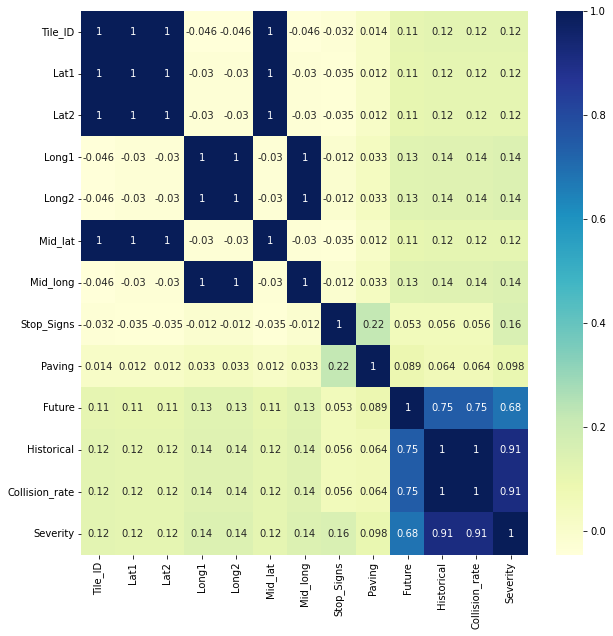

In [152]:
# plotting correlation heatmap
fig, ax = mp.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(tiles.corr(), cmap="YlGnBu", annot=True)

<ipython-input-153-8ee179e018ba>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


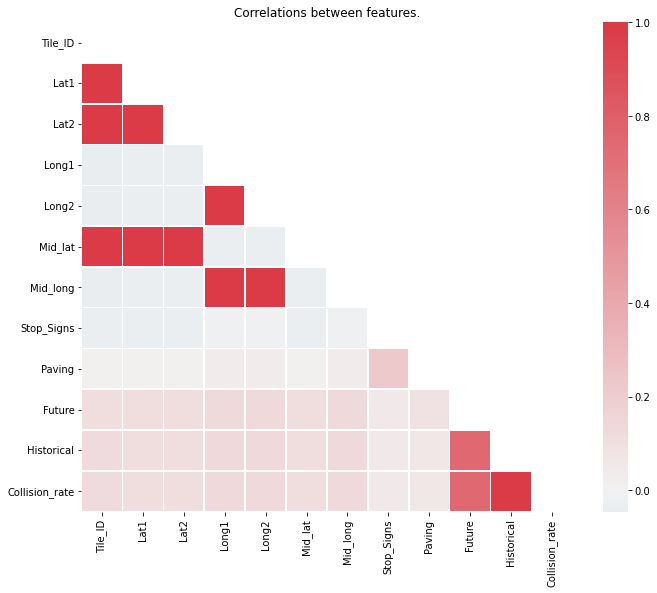

In [153]:
corr = tiles[columns_all[:-1]].corr()
fig, ax = mp.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
mp.title("Correlations between features.")
mp.show()

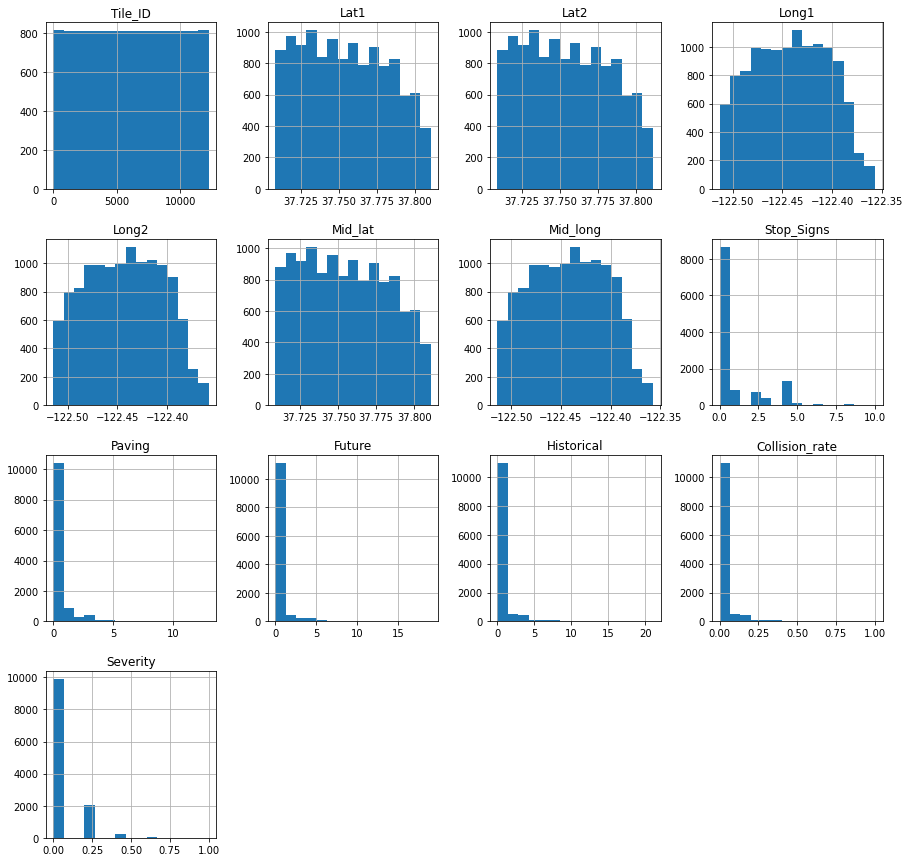

In [154]:
tiles[columns_all[:]].hist(figsize=(15,15), bins=15)
mp.show()

In [155]:
print('How many tiles had the same historical and future number of collisions')
x1 = len(tiles.loc[tiles['Historical'] == tiles['Future']])
print(x1)

print('How many had future number of collisions go up')
x2 = len(tiles.loc[tiles['Historical'] < tiles['Future']])
print(x2)

print('How many had future number of collisions go down')
x3 = len(tiles.loc[tiles['Historical'] > tiles['Future']])
print(x3)

How many tiles had the same historical and future number of collisions
9551
How many had future number of collisions go up
1202
How many had future number of collisions go down
1474


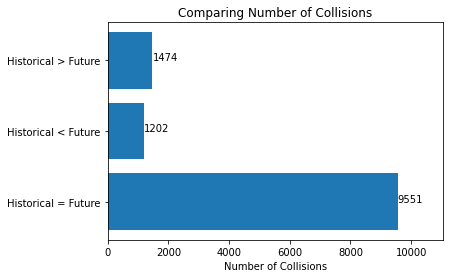

In [156]:
data = {'Historical = Future': x1, 'Historical < Future': x2, 'Historical > Future': x3}
labels = list(data.keys())
values = list(data.values())

fig, ax = mp.subplots()
ax.barh(labels, values)

for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

mp.title('Comparing Number of Collisions')
mp.xlabel('Number of Collisions')
mp.show()

IndexError: ignored

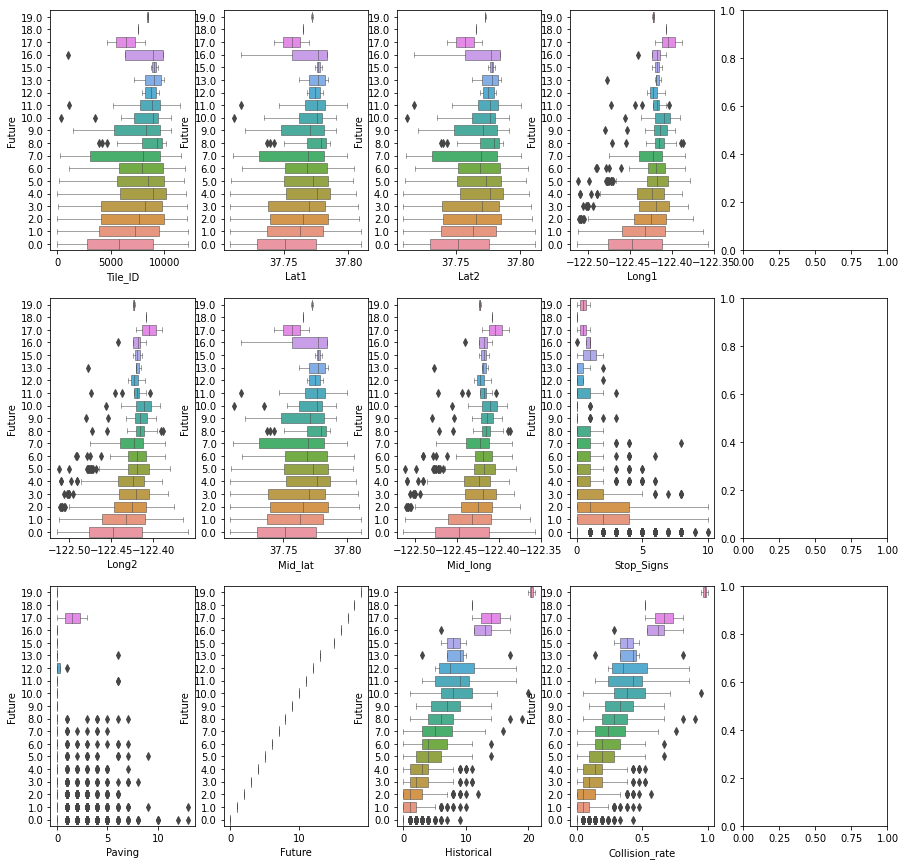

In [157]:
fig, ax_grid = mp.subplots(3, 5, figsize=(15,15))
y = tiles['Future']
for idx, feature in enumerate(columns_all[:]):
    x = tiles[feature]
    sns.boxplot(x=x, y=y, ax=ax_grid[idx//4][idx%4], orient='h', linewidth=.5)
    ax_grid[idx//4][idx%4].invert_yaxis()
fig.suptitle("Individual Features vs. Outcome (Future)", fontsize=15, y=0.9)
mp.show()